## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/train'
valid_path = 'Dataset/test'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('Dataset/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1512 images belonging to 5 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 500 images belonging to 5 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\balaji computer\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
48/48 [==============================] - 209s 4s/step - loss: 4.4687 - accuracy: 0.2579 - val_loss: 2.1699 - val_accuracy: 0.3320
Epoch 2/50
48/48 [==============================] - 201s 4s/step - loss: 1.7511 - accuracy: 0.3499 - val_loss: 1.8656 - val_accuracy: 0.3200
Epoch 3/50
48/48 [==============================] - 197s 4s/step - loss: 1.9147 - accuracy: 0.3333 - val_loss: 1.8672 - val_accuracy: 0.2860
Epoch 4/50
48/48 [==============================] - 199s 4s/step - loss: 1.6147 - accuracy: 0.3704 - val_loss: 1.3904 - val_accuracy: 0.4660
Epoch 5/50
48/48 [==============================] - 200s 4s/step - loss: 1.6116 - accuracy: 0.3843 - val_loss: 1.4392 - val_accuracy: 0.4140
Epoch 6/50
48/48 [==============================] - 200s 4s/step - loss: 1.5444 - accuracy: 0.4101 - val_loss: 2.8958 - val_accuracy: 0.3860
Epoch 7/50
48/48 [==============================] - 199s 4s/step - loss: 1.6790 - accuracy: 0.4220 - val_loss: 1.5698 - val_accuracy: 0.4500
Epoch 8/50
48

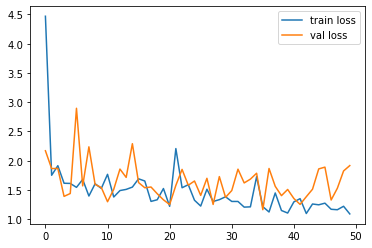

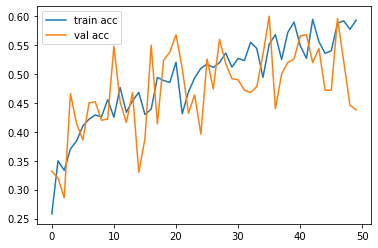

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Smart_bin.h5')

C:\Users\balaji computer\anaconda3\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [17]:

y_pred = model.predict(test_set)


In [18]:
y_pred

array([[3.5960228e-09, 1.6960212e-04, 9.9982280e-01, 6.3415796e-06,
        1.2981468e-06],
       [1.8357528e-02, 4.4590971e-01, 1.0643963e-02, 5.1799196e-01,
        7.0967874e-03],
       [3.7924804e-02, 6.3258328e-04, 1.2081680e-02, 9.4860858e-01,
        7.5228518e-04],
       ...,
       [2.2453601e-02, 6.5261316e-01, 2.8115440e-02, 1.3923058e-01,
        1.5758726e-01],
       [8.3363217e-01, 7.6356838e-03, 2.0281076e-03, 1.4779513e-01,
        8.9089712e-03],
       [5.8831451e-03, 3.0876434e-04, 4.2589752e-05, 9.8890430e-01,
        4.8612785e-03]], dtype=float32)

In [19]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [20]:
y_pred

array([2, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4,
       4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 4, 3, 3, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 4, 0, 3, 0, 3, 3, 0, 0, 3, 3, 0, 1, 4, 3, 1, 3, 3,
       0, 3, 3, 4, 4, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 4, 0, 3, 3, 3, 3,
       3, 0, 3, 0, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 0, 3,
       2, 3, 3, 3, 4, 3, 0, 0, 0, 3, 1, 0, 4, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 2, 0, 3, 4, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 4, 0, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 4, 2, 3, 0, 3, 3, 0, 4, 2, 0, 3, 3, 3, 4, 3, 3,
       2, 3, 3, 3, 3, 2, 2, 3, 0, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 4, 3, 0, 0, 4, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3,
       4, 3, 4, 3, 3, 4, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 0, 3,
       3, 2, 3, 0, 4, 3, 3, 3, 1, 3, 4, 3, 0, 3, 4,

In [21]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('Smart_bin.h5')

In [24]:
img_data

NameError: name 'img_data' is not defined

In [26]:
img=image.load_img('Dataset/Test/glass/glass11.jpg',target_size=(224,224))



In [27]:
x=image.img_to_array(img)
x

array([[[215., 218., 233.],
        [214., 217., 232.],
        [213., 216., 231.],
        ...,
        [169., 171., 184.],
        [169., 171., 184.],
        [169., 171., 184.]],

       [[215., 218., 233.],
        [214., 217., 232.],
        [213., 216., 231.],
        ...,
        [169., 171., 184.],
        [169., 171., 184.],
        [169., 171., 184.]],

       [[215., 218., 233.],
        [214., 217., 232.],
        [213., 216., 231.],
        ...,
        [170., 172., 185.],
        [170., 172., 185.],
        [170., 172., 185.]],

       ...,

       [[227., 230., 245.],
        [226., 229., 244.],
        [225., 228., 243.],
        ...,
        [214., 216., 229.],
        [213., 215., 228.],
        [212., 214., 227.]],

       [[227., 230., 245.],
        [226., 229., 244.],
        [225., 228., 243.],
        ...,
        [214., 216., 229.],
        [213., 215., 228.],
        [212., 214., 227.]],

       [[227., 230., 245.],
        [226., 229., 244.],
        [225., 2

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

array([[7.2307803e-06, 1.0911987e-15, 9.2487519e-13, 9.9999273e-01,
        1.9301709e-37]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

In [33]:
a==1

array([False])